# Santander customer satisfaction

## Projeto com Feedback - Aluno da formação FCD - Data Science Academy

## 1.1 Prever se um cliente irá cancelar o serviço no Banco Santander

### 1.1.1 Problema de negócio - https://www.kaggle.com/c/santander-customer-satisfaction
A satisfação do cliente é uma medida fundamental de sucesso. Clientes insatisfeitos cancelam
seus serviços e raramente expressam sua insatisfação antes de sair. Clientes satisfeitos, por outro
lado, se tornam defensores da marca! O Banco Santander está pedindo para ajudá-los a identificar
clientes insatisfeitos no início do relacionamento. Isso permitiria que o Santander adotasse medidas
proativas para melhorar a felicidade de um cliente antes que seja tarde demais. Neste projeto
de aprendizado de máquina, você trabalhará com centenas de recursos anônimos para prever se
um cliente está satisfeito ou insatisfeito com sua experiência bancária. Defina claramente o problema
de negócio, faça a coleta e preparo dos dados, escolha um algoritmo, treine o modelo e avalie
a acurácia, que deve ser de pelo menos 70%. Para este projeto, recomendamos a utilização da
linguagem Python e o dataset disponível no Kaggle em: https://www.kaggle.com/c/santandercustomer-
satisfaction

### Bibliotecas utilizadas

In [3]:
import pandas as pd ##pandas dataframes are often used for statistical analysis,
import numpy as np ##calculate mean and standard deviation
import seaborn as sb ##includes convenient heatmaps and boxplots
import sklearn.linear_model as sklm ##Includes Logistic Regression, which will be tested for predictive capability
import sklearn.decomposition as skdc ##Includes Principal Component Analysis, a method of dimensionality reduction
import sklearn.pipeline as skpl ##Convenient module for calculating PCs and using them in logistic regression
%matplotlib inline
from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
# import some data within sklearn for iris classification
from pandas_profiling import ProfileReport
#profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
from sklearn.model_selection import train_test_split

### Carregar os dados

In [4]:
import os

In [5]:
os.getcwd() # verificar o diretório de trabalho

'C:\\Users\\mayco'

In [6]:
df = pd.read_csv('C:/Users/mayco/santander/train.csv')

In [7]:
df = df.drop('ID',1) # deletar coluna ID, não deve ser usada

In [8]:
df.head() #exibir as primeiras linhas do dataset

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [11]:
df.columns # examinar as colunas

Index(['var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3', 'imp_op_var40_ult1',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=370)

In [12]:
df.shape # examinar o numero de colunas e linhas

(76020, 370)

In [13]:
df.describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,8237.820000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [14]:
X = df.drop('TARGET', axis = 1) # armazenar a variável de resposta

In [15]:
y = df['TARGET'] # armazenar as features

## Examinar o balanceamento do dataset 

In [16]:
# example of random oversampling to balance the class distribution
# temos um número muito maior da classe "1" comparada a classe "0"
from collections import Counter
from imblearn.over_sampling import RandomOverSampler 

print(Counter(y))

Counter({0: 73012, 1: 3008})


## Balanceando o Dataset

In [19]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X, y= oversample.fit_resample(X, y)
# summarize class distribution
print(Counter(y))

Counter({0: 73012, 1: 73012})


## Separar os dados em treino e teste e montar o pipeline de transformação dos dados

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
 
from sklearn.pipeline import Pipeline
pipe = Pipeline([('pca', PCA(n_components = 20)), 
                 ('std', StandardScaler()), 
                 ('Decision_tree', DecisionTreeClassifier())], verbose = True)
 
pipe.fit(X_train, y_train)
 
# to see all the hyper parameters
pipe.get_params()

[Pipeline] ............... (step 1 of 3) Processing pca, total=   4.9s
[Pipeline] ............... (step 2 of 3) Processing std, total=   0.1s
[Pipeline] ..... (step 3 of 3) Processing Decision_tree, total=   1.9s


{'memory': None,
 'steps': [('pca', PCA(n_components=20)),
  ('std', StandardScaler()),
  ('Decision_tree', DecisionTreeClassifier())],
 'verbose': True,
 'pca': PCA(n_components=20),
 'std': StandardScaler(),
 'Decision_tree': DecisionTreeClassifier(),
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': 20,
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'std__copy': True,
 'std__with_mean': True,
 'std__with_std': True,
 'Decision_tree__ccp_alpha': 0.0,
 'Decision_tree__class_weight': None,
 'Decision_tree__criterion': 'gini',
 'Decision_tree__max_depth': None,
 'Decision_tree__max_features': None,
 'Decision_tree__max_leaf_nodes': None,
 'Decision_tree__min_impurity_decrease': 0.0,
 'Decision_tree__min_impurity_split': None,
 'Decision_tree__min_samples_leaf': 1,
 'Decision_tree__min_samples_split': 2,
 'Decision_tree__min_weight_fraction_leaf': 0.0,
 'Decision_tree__presort': 'deprecated',
 'Decision_tree__rand

In [21]:
# Predicting the Test set results
y_pred = pipe.predict(X_test)

## Examinar se o modelo é capaz de prever as duas classes

In [22]:
np.unique(y_pred)

array([0, 1], dtype=int64)

## Avaliação do modelo com confusion matrix

In [23]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn import metrics

cm = confusion_matrix(y_test, y_pred) # Calculate Confusion matrix for test set.

In [24]:
print(cm)

[[16548  1621]
 [  234 18103]]


## Classification Report

In [25]:
print('Printing the precision and recall, among other metrics')

print(classification_report(y_test, y_pred))

Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     18169
           1       0.92      0.99      0.95     18337

    accuracy                           0.95     36506
   macro avg       0.95      0.95      0.95     36506
weighted avg       0.95      0.95      0.95     36506



## Construindo o plot AUC

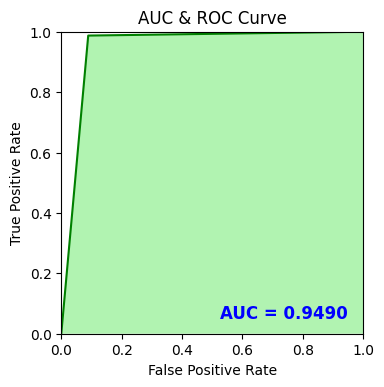

In [26]:
auc = metrics.roc_auc_score(y_test, y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(7,4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()